In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,classification_report,
                             f1_score,roc_curve,log_loss,r2_score,mean_squared_error,mean_absolute_error)

from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor,SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

#### Part 1
claim amount in the Automobile insurance dataset

In [2]:
# reading data from csv file
pac= pd.read_csv('Auto_Insurance_Claims_amount.csv')
pac.head(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


###### Performing EDA

In [3]:
# checking shape of data
pac.shape

(9134, 26)

In [4]:
# checking data information
pac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [5]:
#checking unique value in each row
pac.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [6]:
# checking null value
pac.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

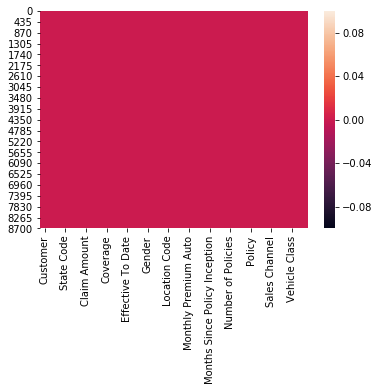

In [7]:
# heatmap of null value
sns.heatmap(pac.isnull())

In [8]:
# checking the data description
pac.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# corelation between coloums
pac.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


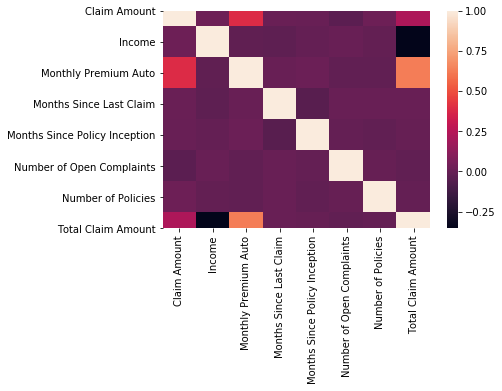

In [10]:
# heat map of corelation
sns.heatmap(pac.corr())

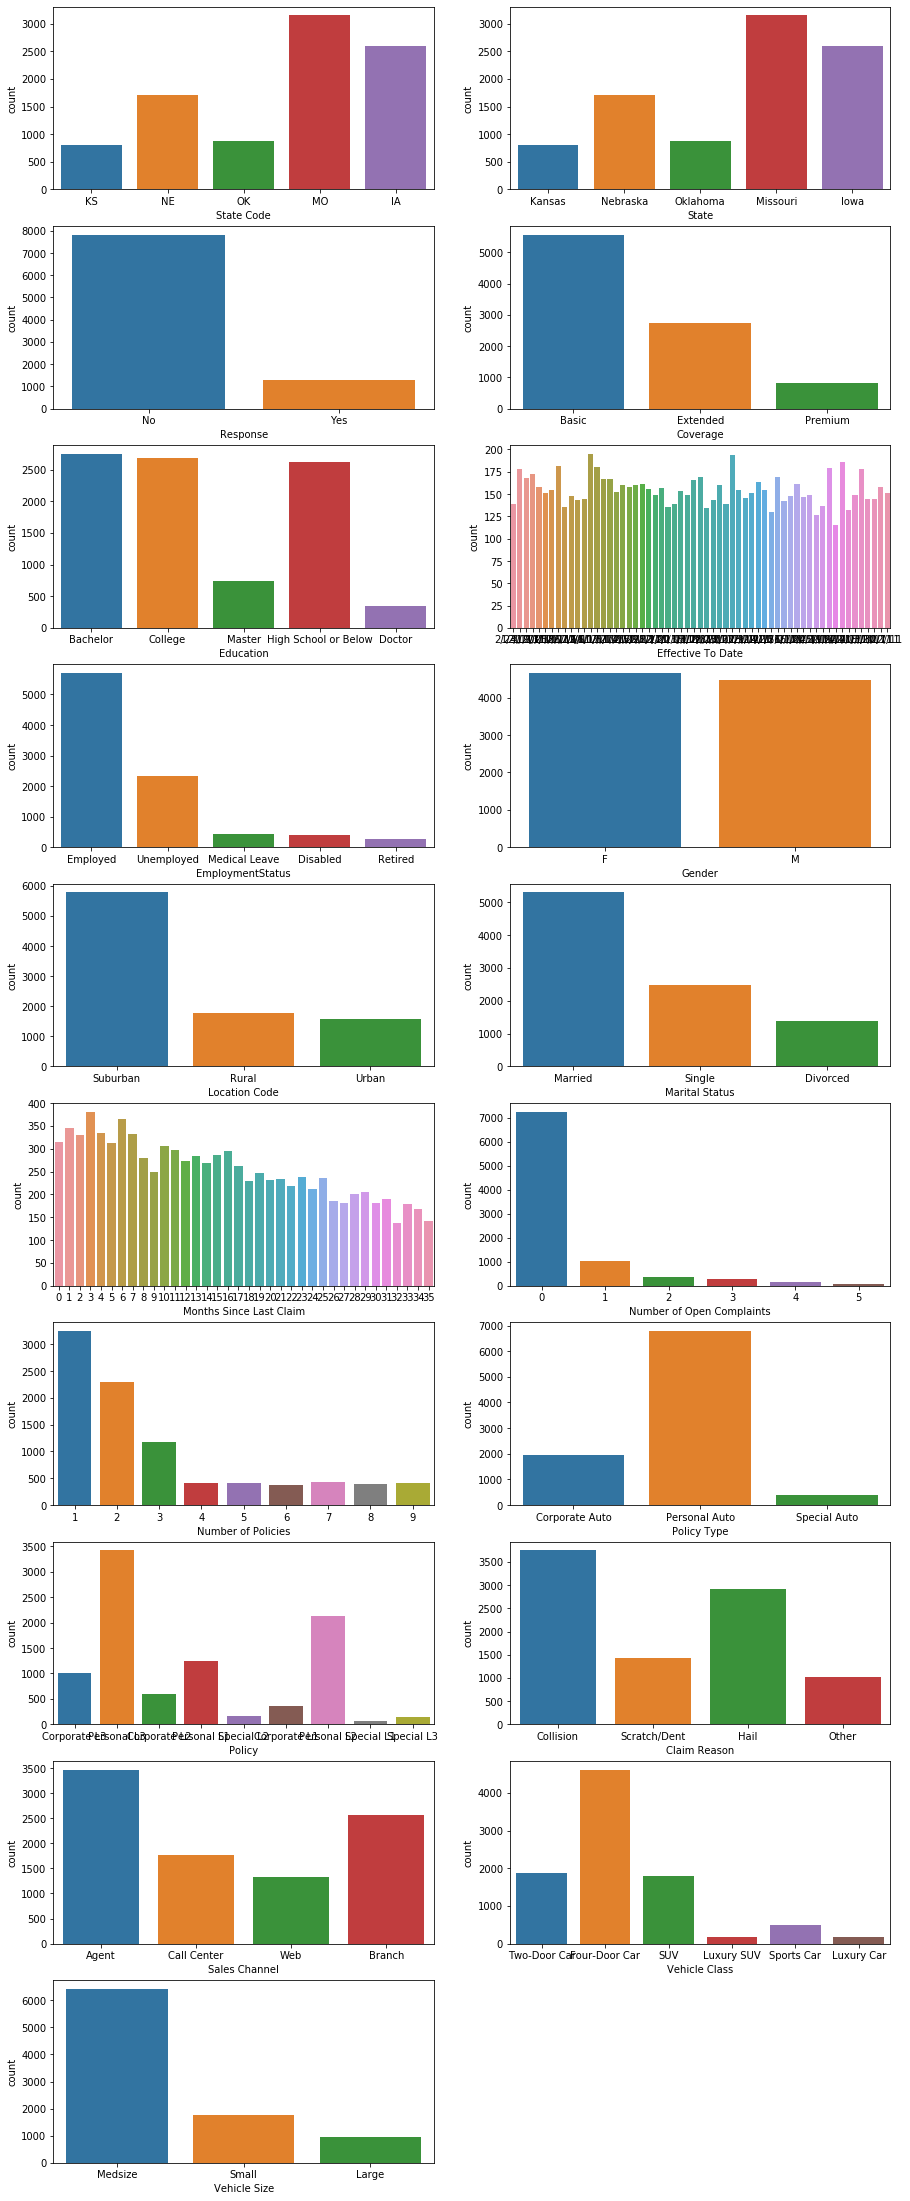

In [11]:
#creating barplot of colums to check the count of indivisual value
Index=pac[['State Code','State','Response','Coverage','Education','Effective To Date','EmploymentStatus','Gender',
           'Location Code','Marital Status','Months Since Last Claim','Number of Open Complaints','Number of Policies',
           'Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size']]
figure(num=None,figsize=(15,80))
for column_index,col in enumerate(Index.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(x=Index[col],data=Index)

In [12]:
# checking count and percentage of diffrent values in each coloums
year = pac[['State','Response','Coverage','Education','EmploymentStatus','Gender','Location Code',
            'Marital Status','Number of Open Complaints','Number of Policies','Policy Type','Policy','Claim Reason',
            'Sales Channel','Vehicle Class','Vehicle Size']]

for column_index, column in enumerate(year.columns):
    print('\x1b[1;31m'+'Count of diffrent values in',column,'column'+'\x1b[0m')
    print(year[column].value_counts(),'\n\n')
    print('\x1b[1;31m'+'Percentage of diffrent values in',column,'column'+'\x1b[0m')
    print(year[column].value_counts(normalize=True),'\n\n')

Count of diffrent values in State column
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64 


Percentage of diffrent values in State column
Missouri    0.344865
Iowa        0.284760
Nebraska    0.186446
Oklahoma    0.096562
Kansas      0.087366
Name: State, dtype: float64 


Count of diffrent values in Response column
No     7826
Yes    1308
Name: Response, dtype: int64 


Percentage of diffrent values in Response column
No     0.856799
Yes    0.143201
Name: Response, dtype: float64 


Count of diffrent values in Coverage column
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64 


Percentage of diffrent values in Coverage column
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: Coverage, dtype: float64 


Count of diffrent values in Education column
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor        

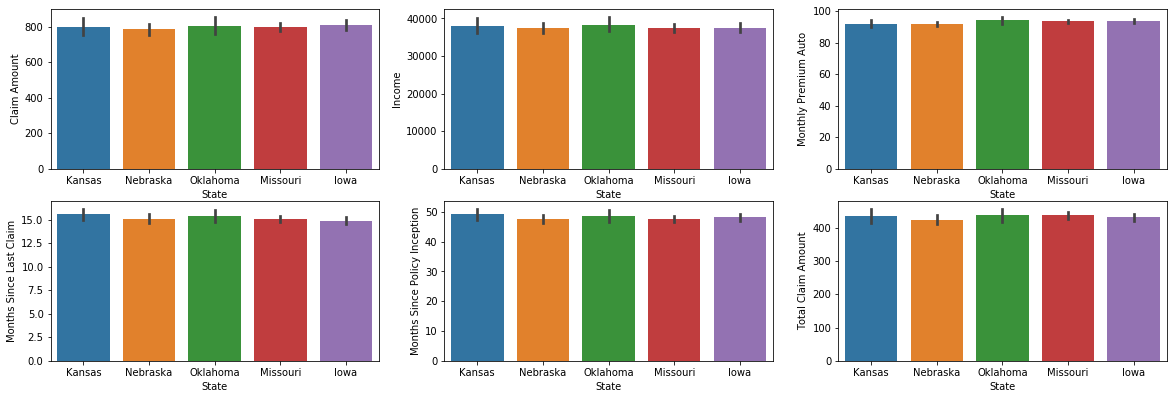

In [13]:
# creating bar plot of colums with respect to State to check distribution among State
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','State']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'State':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='State', y=column, data=count)

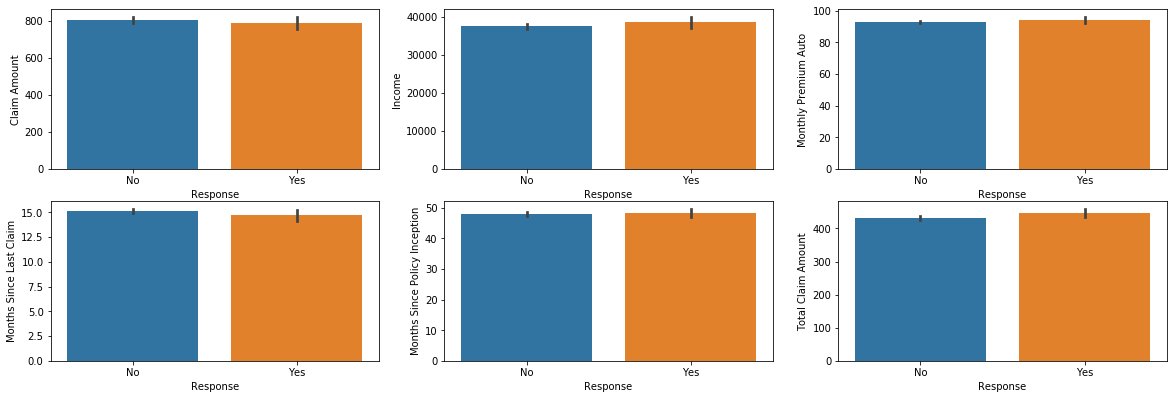

In [14]:
# creating bar plot of colums with respect to Response to check distribution among Response
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Response']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Response':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Response', y=column, data=count)

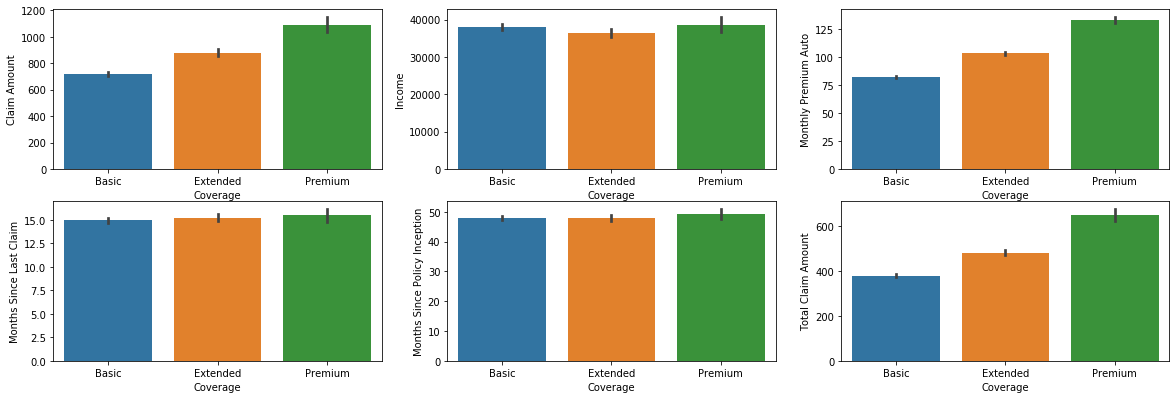

In [15]:
# creating bar plot of colums with respect to Coverage to check distribution among Coverage
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Coverage']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Coverage':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Coverage', y=column, data=count)

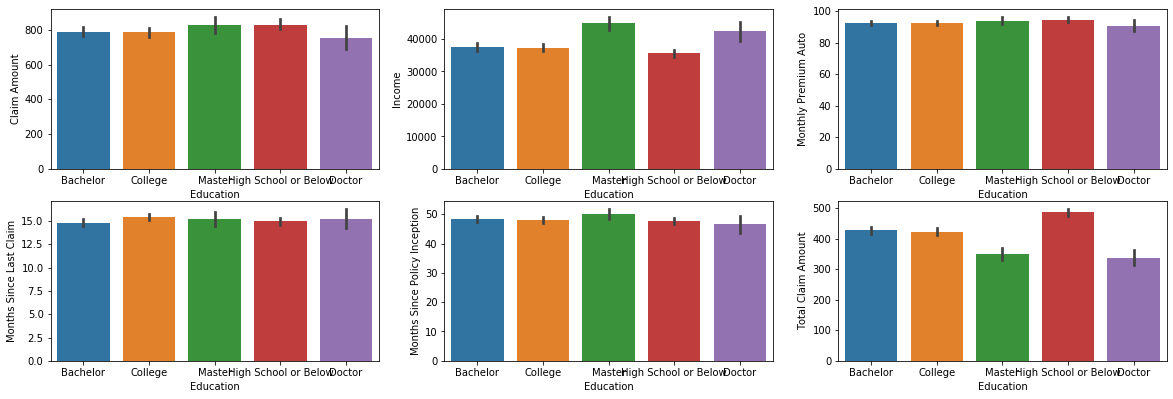

In [16]:
# creating bar plot of colums with respect to Education to check distribution among Education
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Education']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Education':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Education', y=column, data=count)
    

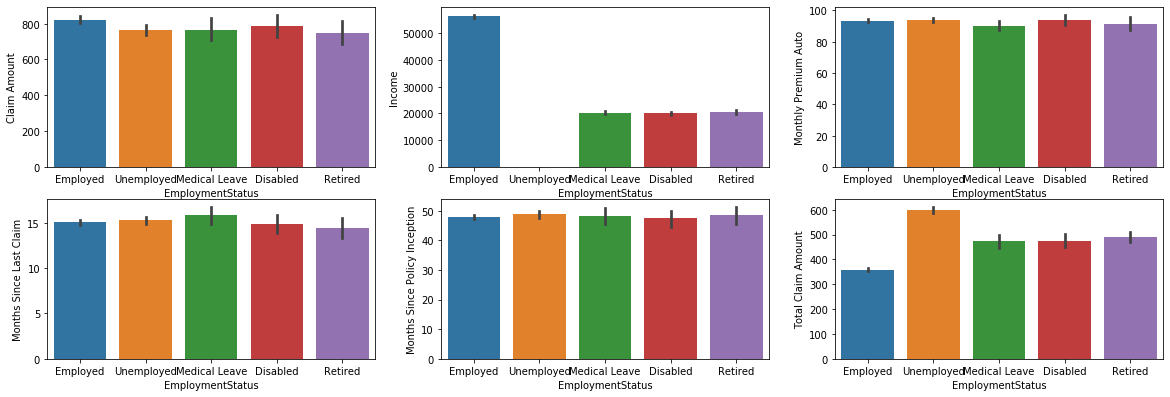

In [17]:
# creating bar plot of colums with respect to EmploymentStatus to check distribution among EmploymentStatus
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','EmploymentStatus']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'EmploymentStatus':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='EmploymentStatus', y=column, data=count)

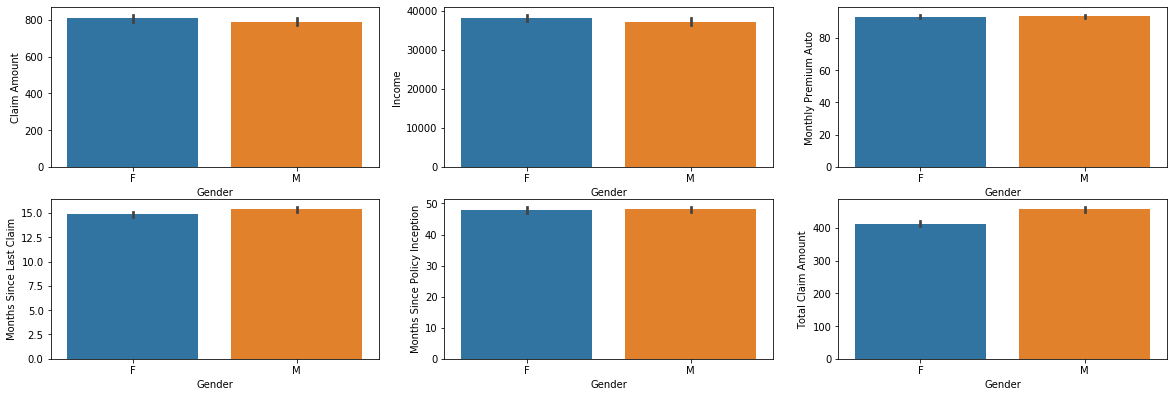

In [18]:
# creating bar plot of colums with respect to Gender to check distribution among Gender
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Gender']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Gender':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Gender', y=column, data=count)

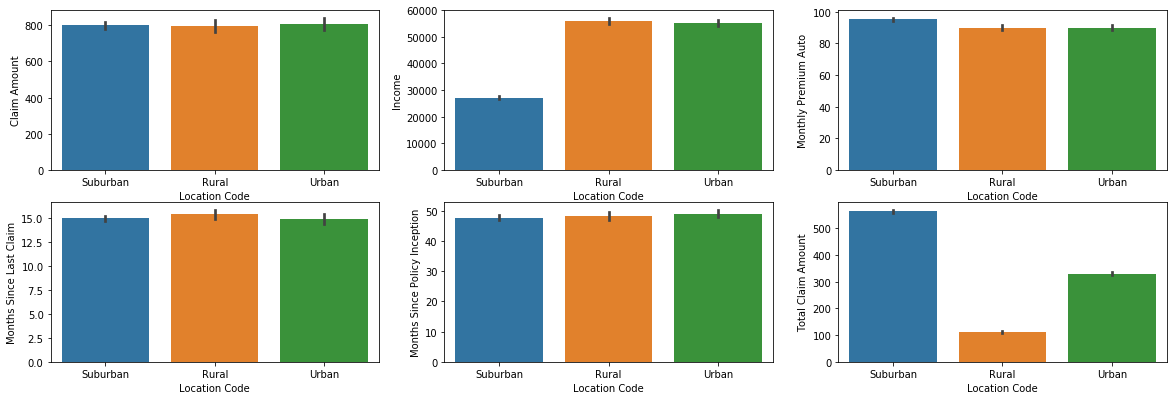

In [19]:
# creating bar plot of colums with respect to Location Code to check distribution among Location Code
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Location Code']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Location Code':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Location Code', y=column, data=count)

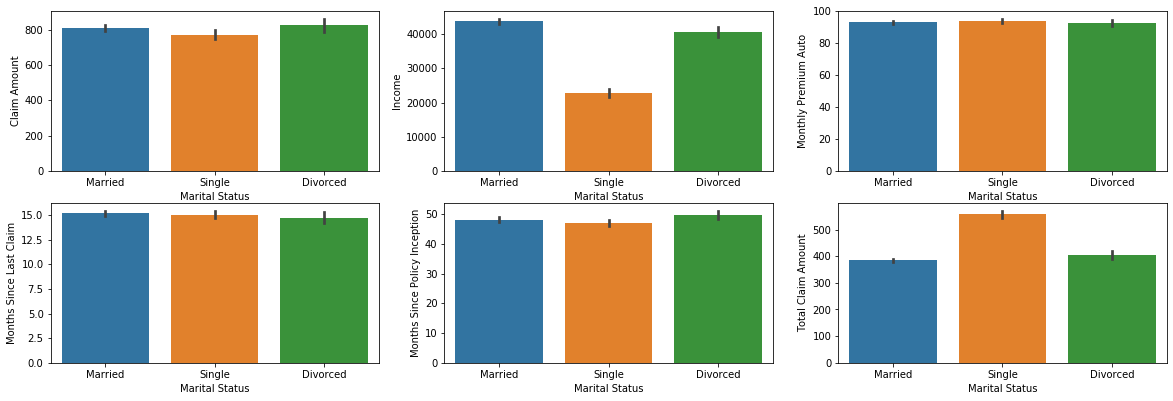

In [20]:
# creating bar plot of colums with respect to Marital Status to check distribution among Marital Status
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Marital Status']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Marital Status':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Marital Status', y=column, data=count)

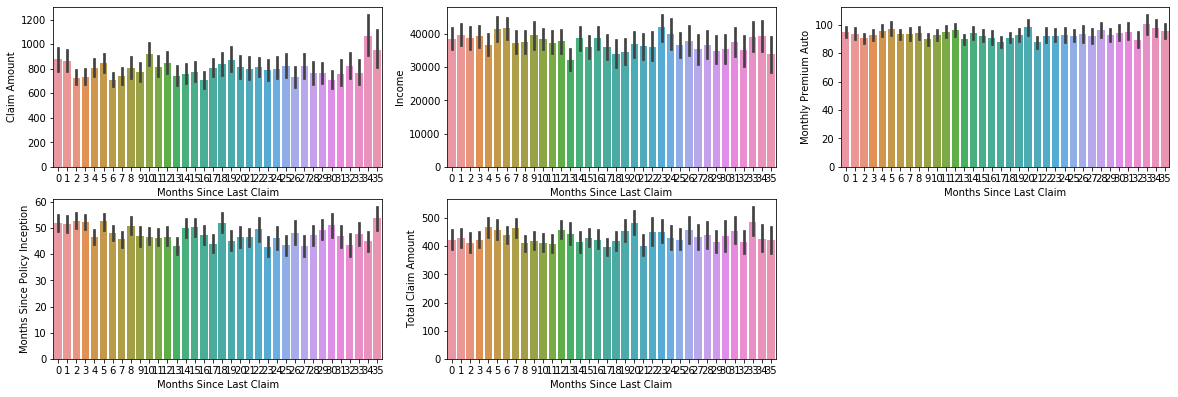

In [21]:
# creating bar plot of colums with respect to Months Since Last Claim to check distribution among Months Since Last Claim
count=pac[['Claim Amount','Income','Monthly Premium Auto','Months Since Policy Inception','Total Claim Amount',
           'Months Since Last Claim']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Months Since Last Claim':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Months Since Last Claim', y=column, data=count)

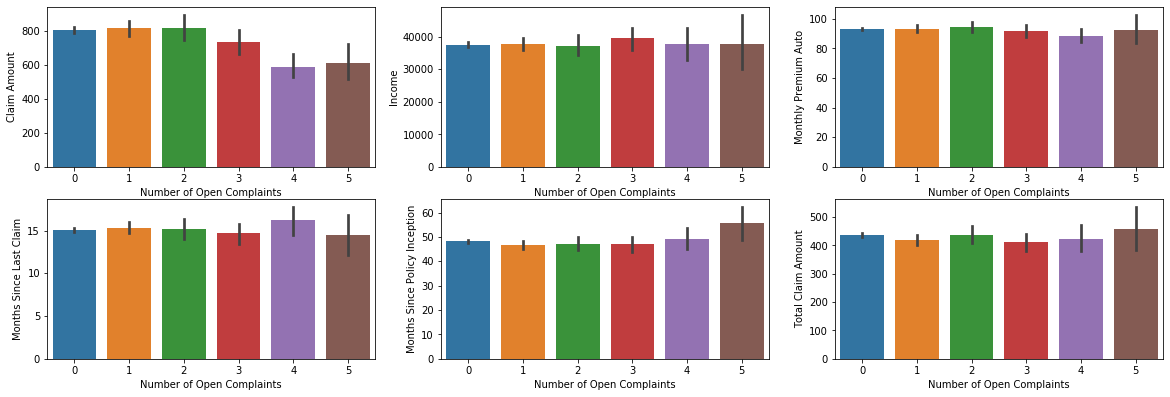

In [22]:
# creating bar plot of colums with respect to Number of Open Complaints to check distribution among Number of Open Complaints
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Number of Open Complaints']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Number of Open Complaints':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Number of Open Complaints', y=column, data=count)

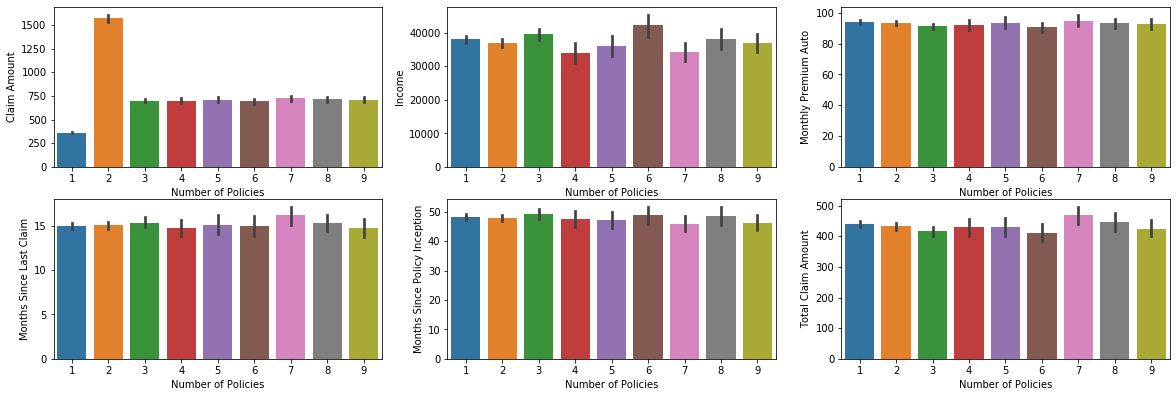

In [23]:
# creating bar plot of colums with respect to Number of Policies to check distribution among Number of Policies
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Number of Policies']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Number of Policies':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Number of Policies', y=column, data=count)

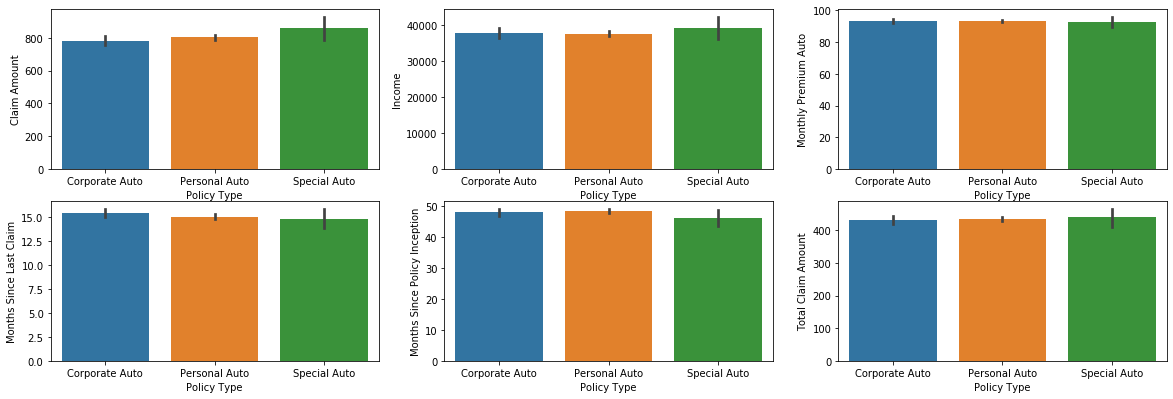

In [24]:
# creating bar plot of colums with respect to Policy Type to check distribution among Policy Type
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Policy Type']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Policy Type':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Policy Type', y=column, data=count)

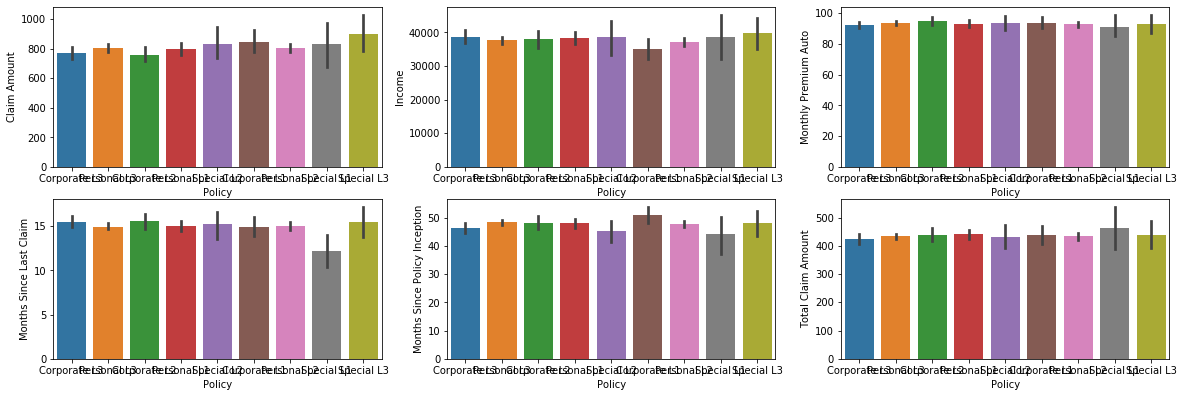

In [25]:
# creating bar plot of colums with respect to Policy to check distribution among Policy
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Policy']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Policy':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Policy', y=column, data=count)

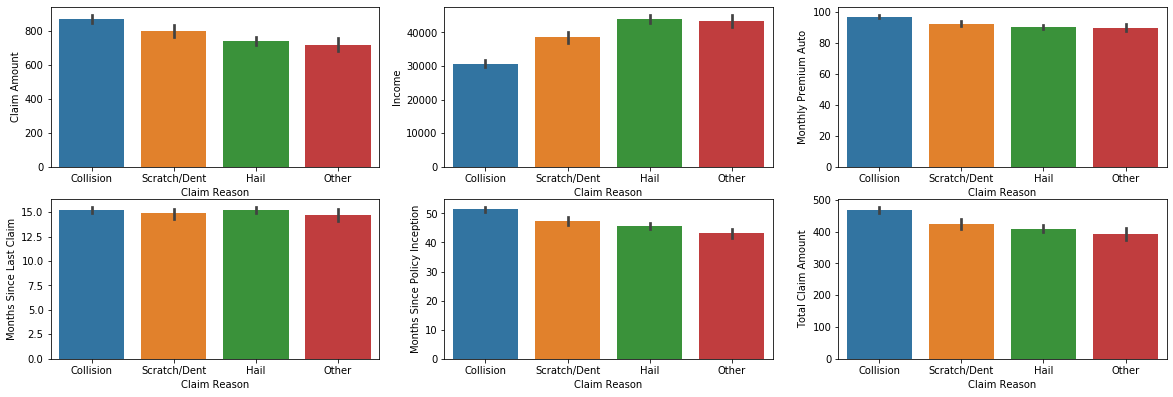

In [26]:
# creating bar plot of colums with respect to Claim Reason to check distribution among Claim Reason
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Claim Reason']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Claim Reason':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Claim Reason', y=column, data=count)

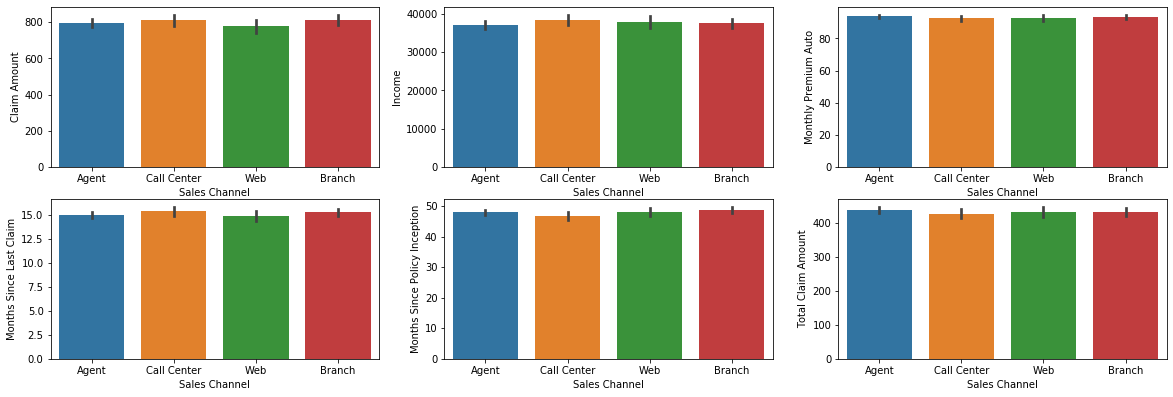

In [27]:
# creating bar plot of colums with respect to Sales Channel to check distribution among Sales Channel
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Sales Channel']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Sales Channel':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Sales Channel', y=column, data=count)

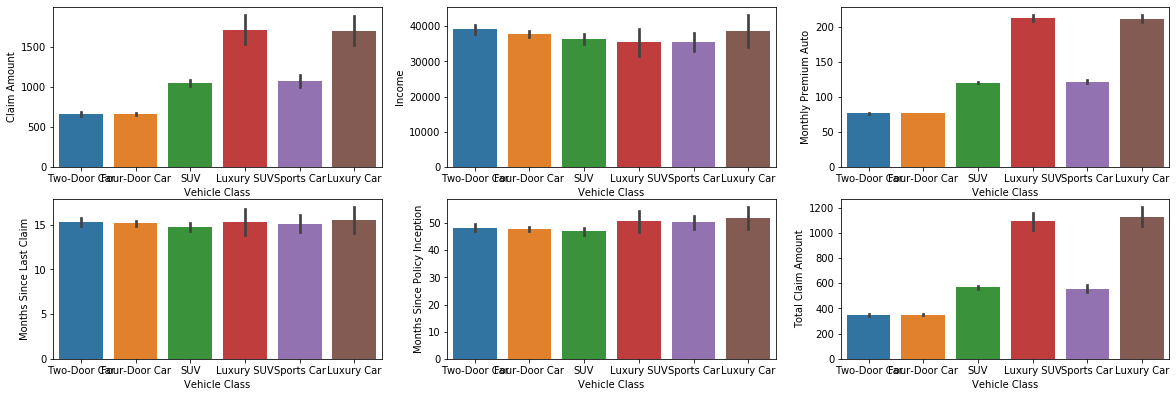

In [28]:
# creating bar plot of colums with respect to Vehicle Class to check distribution among Vehicle Class
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Vehicle Class']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Vehicle Class':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Vehicle Class', y=column, data=count)

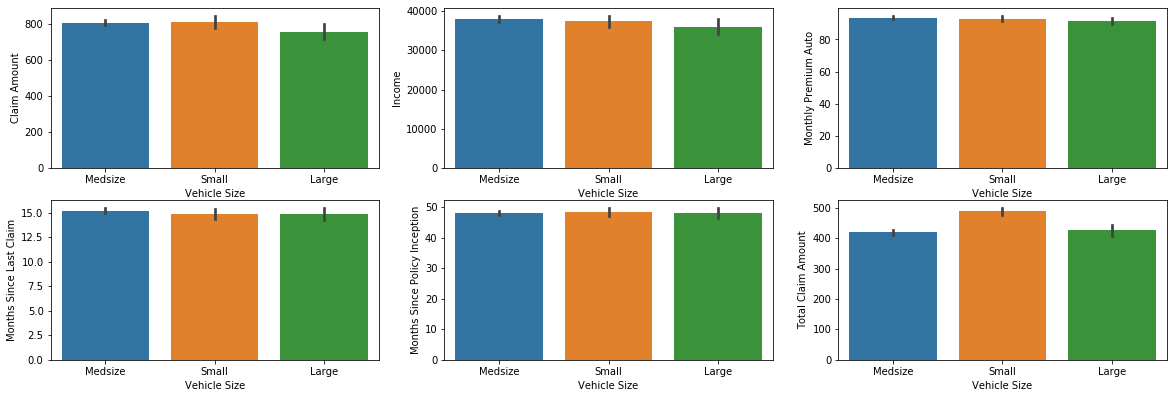

In [29]:
# creating bar plot of colums with respect to Vehicle Size to check distribution among Vehicle Size
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount','Vehicle Size']]
figure(num=None,figsize=(20,10))
for column_index, column in enumerate(count.columns):
    if column == 'Vehicle Size':
        continue
    plt.subplot(3, 3, column_index+1)
    
    sns.barplot(x='Vehicle Size', y=column, data=count)

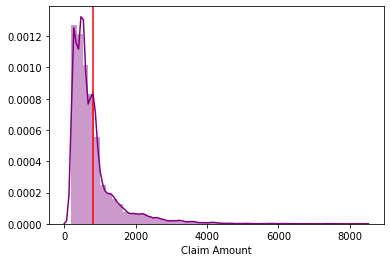

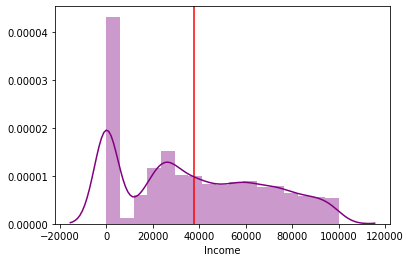

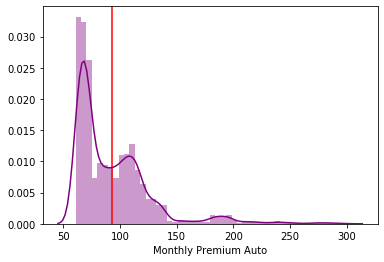

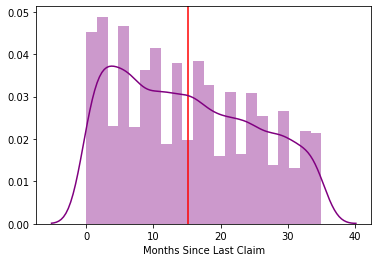

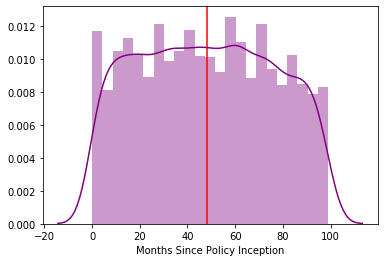

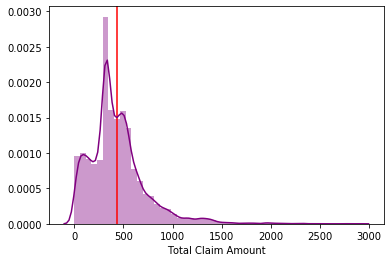

In [30]:
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount']]
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(count):
    plt.figure(i)
    plt.axvline(count[col].mean(),color = 'r')
    sns.distplot(count[col],color='purple')

Claim Amount                        AxesSubplot(0.125,0.772143;0.227941x0.107857)
Income                           AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Monthly Premium Auto             AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Months Since Last Claim             AxesSubplot(0.125,0.642714;0.227941x0.107857)
Months Since Policy Inception    AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Number of Open Complaints        AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Number of Policies                  AxesSubplot(0.125,0.513286;0.227941x0.107857)
Total Claim Amount               AxesSubplot(0.398529,0.513286;0.227941x0.107857)
dtype: object

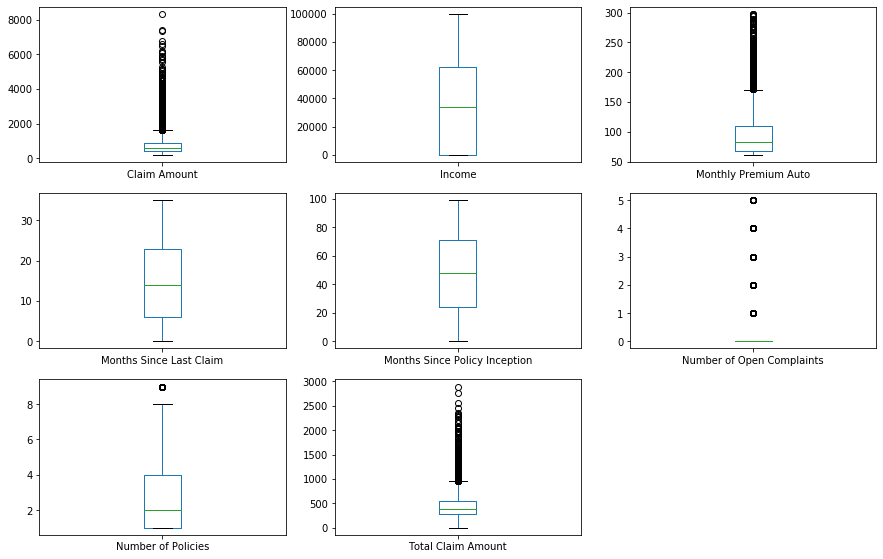

In [31]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
pac.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

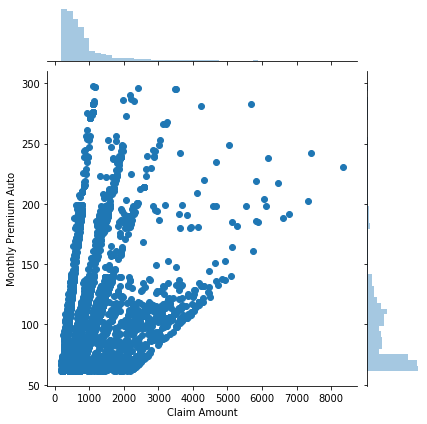

In [32]:
#distribution of Claim Amount and Monthly Premium Auto 
sns.jointplot(x='Claim Amount', y='Monthly Premium Auto', data=pac)

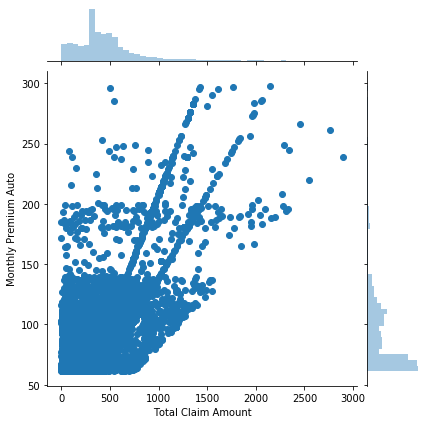

In [33]:
#distribution of Total Claim Amount and Monthly Premium Auto 
sns.jointplot(x='Total Claim Amount', y='Monthly Premium Auto', data=pac)

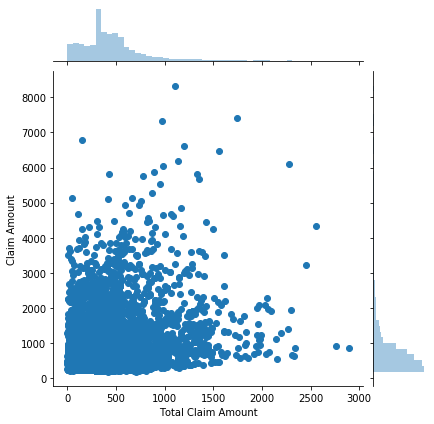

In [34]:
#distribution of Total Claim Amount and Claim Amount 
sns.jointplot(x='Total Claim Amount', y='Claim Amount', data=pac)

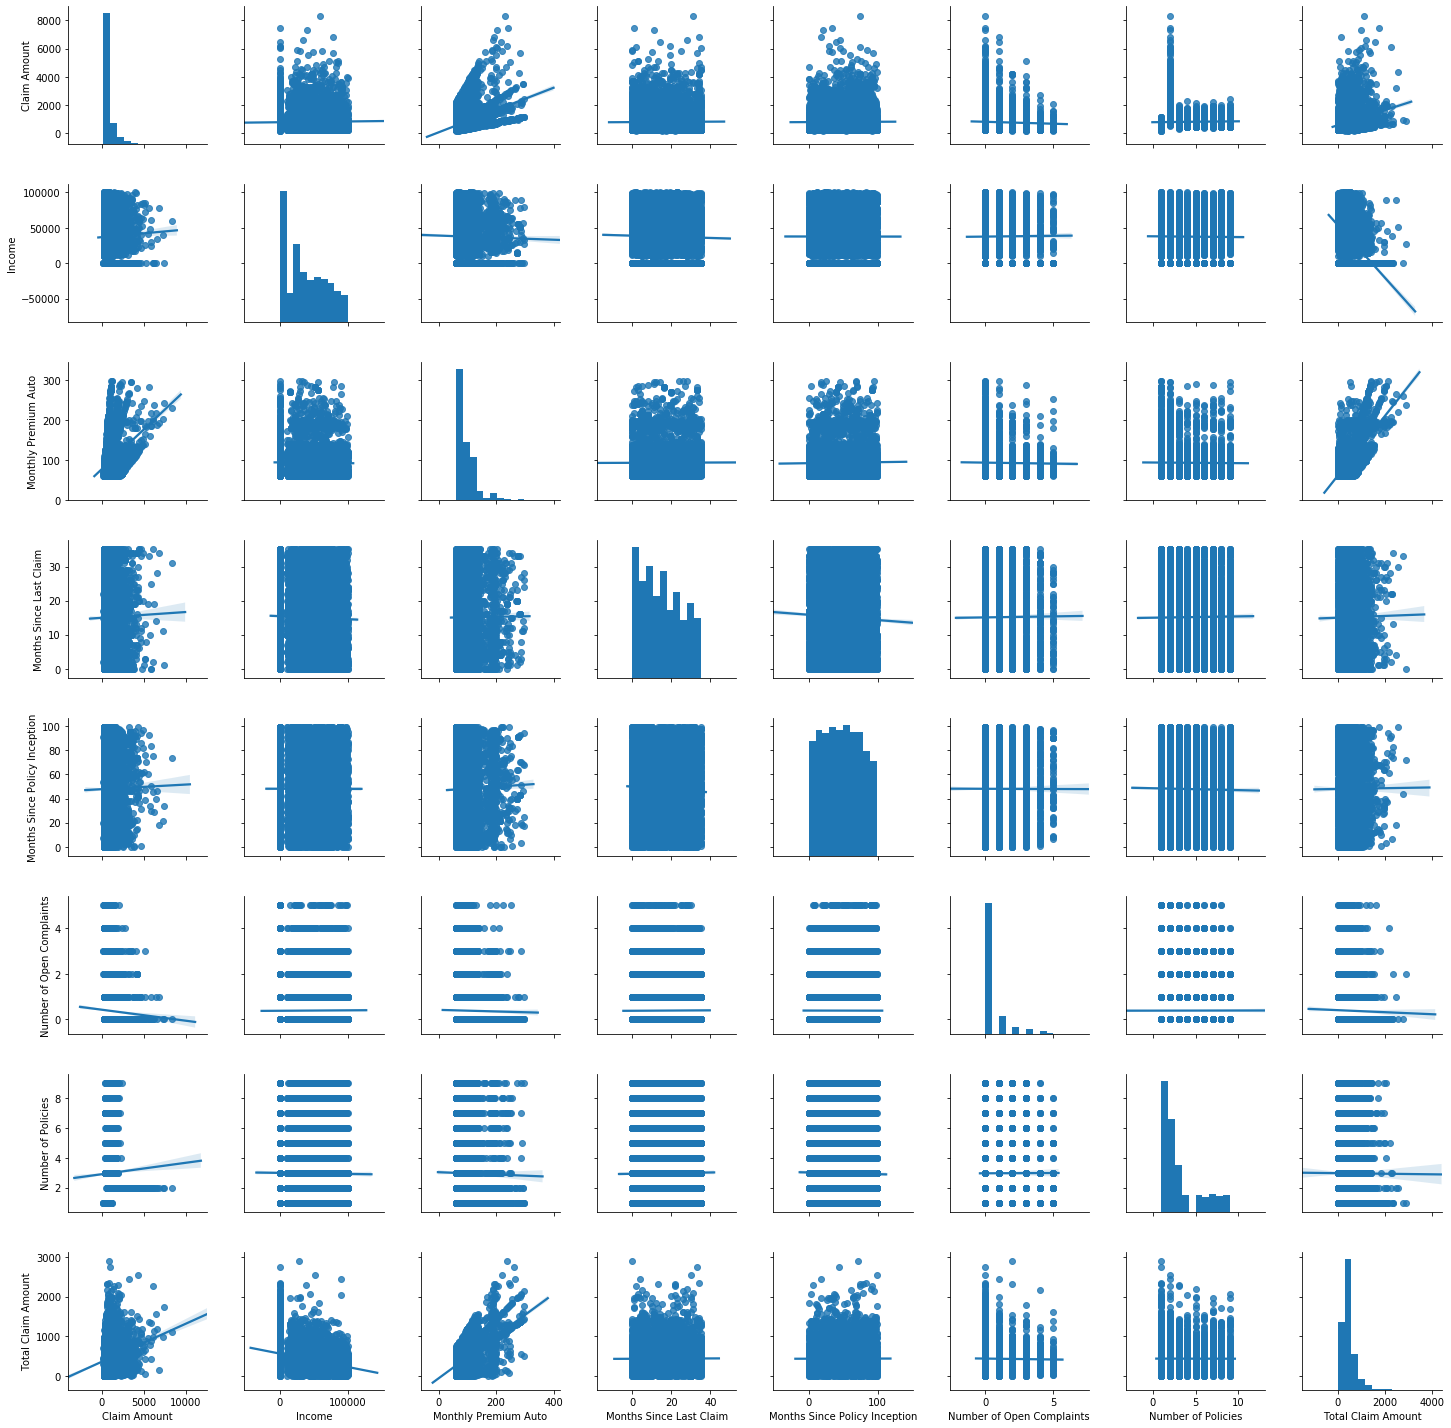

In [35]:
# pair plot to see the scatter of data
sns.pairplot(pac, kind='reg')

###### Manipulating data before bulding the model

In [36]:
#checking skewness
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount']]
print('\x1b[1;31m'+'Skewness in data\n'+'\x1b[0m')
print(count.skew())

Skewness in data

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Total Claim Amount               1.714966
dtype: float64


In [37]:
#removing skewness
for col in count.columns:
    if count.skew().loc[col]>0.55:
        pac[col]=np.power(pac[col],1/3)
pac.skew()

Claim Amount                     1.213436
Income                           0.286887
Monthly Premium Auto             1.316268
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount              -0.415936
dtype: float64

In [38]:
#removing outlires 
count=pac[['Claim Amount','Income','Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception',
           'Total Claim Amount']]
z=abs(zscore(count))
print(pac.shape)
pac=pac.loc[(z<3).all(axis=1)]
print(pac.shape)

(9134, 26)
(8817, 26)


In [39]:
#using dummy and label encoding for changing values to numeric form, and dropping irrelevent columns
pac=pac.drop(['Customer','State','Country','Effective To Date'], axis=1)

pac=pd.get_dummies(pac, columns=['State Code', 'Response','EmploymentStatus', 'Gender', 'Location Code','Marital Status',
                                 'Policy Type', 'Policy', 'Claim Reason','Sales Channel'])

#masking of object column
categorial_mask=pac.dtypes==object

#categorical columns
categorical_cols=pac.columns[categorial_mask].tolist()

le=LabelEncoder()

pac[categorical_cols]=pac[categorical_cols].apply(lambda col:le.fit_transform(col))

pac.sample(5)

,Claim Amount,Coverage,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Policy_Special L2,Policy_Special L3,Claim Reason_Collision,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
6611,9.321126,1,1,0,4.973190,22,25,0,6,9.603124,...,0,0,1,0,0,0,0,0,1,0
6000,6.234902,0,3,22319,3.979057,3,41,1,1,6.712134,...,0,0,1,0,0,0,1,0,0,0
1236,9.644921,0,0,89689,4.198336,14,4,0,2,5.152998,...,0,0,1,0,0,0,0,1,0,0
8491,8.931034,0,1,16139,3.957892,19,69,0,2,6.676430,...,0,0,1,0,0,0,0,1,0,0
3228,9.047250,0,0,22044,4.020726,35,70,0,2,2.182297,...,0,0,1,0,0,0,1,0,0,0


In [40]:
# dividing dataset into input values 'x' and output value 'y'
x = pac.drop(['Claim Amount'],axis=1)
print('x dataset\n',x.head(),'\n')
y=pac['Claim Amount']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    Coverage  Education  Income  Monthly Premium Auto  Months Since Last Claim  \
0         0          0   56274              4.101566                       32   
1         1          0       0              4.546836                       13   
2         2          0   48767              4.762203                       18   
3         0          0       0              4.732623                       18   
4         0          0   43836              4.179339                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  Vehicle Class  ...  \
0                   1            7.273597              5  

In [41]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe regression model, to find out the best model

In [42]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [43]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [44]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
1,GradientBoostingRegressor,0.876837,42
7,RandomForestRegressor,0.871208,88
5,DecisionTreeRegressor,0.784594,14
0,Ridge,0.221440,28
9,SVR,0.221221,42
8,LinearRegression,0.220436,28
4,SGDRegressor,0.215629,28
6,KNeighborsRegressor,0.065941,98
2,ElasticNet,0.056933,42
3,Lasso,0.000000,42


###### Conclusion
On basis of r2 score GradientBoostingRegressor model is performing the best with maximum r2 score, closely followed by RandomForestRegressor model

In [45]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [46]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
1,GradientBoostingRegressor,0.858701,0.010839
7,RandomForestRegressor,0.857552,0.013933
5,DecisionTreeRegressor,0.748835,0.025383
0,Ridge,0.184607,0.028801
8,LinearRegression,0.184067,0.028709
4,SGDRegressor,0.177102,0.030007
9,SVR,0.172938,0.029151
2,ElasticNet,0.052857,0.004472
6,KNeighborsRegressor,0.032182,0.024376
3,Lasso,-0.000535,0.000668


###### Conclusion
On basis of Cross val Acuracy GradientBoostingRegressor model is performing the best with maximum cross val score

###### On basis of our compression of r2 , Mean squared error and Cross val score i choose GradientBoostingRegressor model since it performing best on given data

In [47]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'max_depth':[5,6,7],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],'n_estimators':[50,100,200],
            'min_samples_leaf':[3,4,5]}
mod=GradientBoostingRegressor()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [48]:
grid_result.best_score_

0.8665103398423771

In [49]:
grid_result.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [50]:
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
# final model
gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=42,shuffle=True)

kfoldr =KFold(n_splits=10,random_state=5)

gbr.fit(train_x,train_y)
pred_r=gbr.predict(test_x)
score_r=cross_val_score(gbr,x,y,cv=kfoldr,scoring='r2').mean()

print('Model score',gbr.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred_r),'\n')
print('The mean of cross_val_score for the model is:',score_r,'\n')

print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred_r),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred_r),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred_r)),'\n')

Model score 0.9263104641442461 

R2 score of model is : 0.8823970125298863 

The mean of cross_val_score for the model is: 0.8665078663395868 

Mean absolute error for model is :  0.29077826373119764 

Mean squared error for model is :  0.38503045669228014 

Root mean squared error for model is :  0.6205082245162268 



In [48]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 16 Predict the Automobile Insurance claim part 1.csv')

In [49]:
# saving the model using pickle.
joblib.dump(gbr,'gbr_Project 16 Predict the Automobile Insurance claim part 1.pkl')

['gbr_Project 16 Predict the Automobile Insurance claim part 1.pkl']

## Part 2
predict the insurance fraud  in the Automobile insurance dataset

In [50]:
# reading data from csv file
paf= pd.read_csv('Automobile_insurance_fraud.csv')
paf.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
620,438,57,714346,05-10-1991,OH,500/1000,500,1119.29,0,616164,...,NO,40700,4070,4070,32560,Volkswagen,Passat,2000,Y,NaN
587,463,59,638155,03-08-1994,IL,250/500,1000,979.73,0,601848,...,NO,72400,7240,14480,50680,Chevrolet,Tahoe,1999,Y,NaN
545,131,29,811042,04-07-2013,IN,250/500,1000,978.27,0,479821,...,NO,76400,15280,7640,53480,Suburu,Forrestor,2003,N,NaN
912,175,36,155604,03-03-1992,OH,500/1000,500,1185.44,0,437580,...,YES,42680,3880,7760,31040,Accura,RSX,2006,Y,NaN
380,265,41,626074,29-09-1997,IN,250/500,2000,1724.46,6000000,432491,...,?,44200,4420,4420,35360,Audi,A5,2014,N,NaN


###### Performing EDA

In [51]:
# checking shape of data
paf.shape

(1000, 40)

In [52]:
# checking data information
paf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [53]:
#checking unique value in each row
paf.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [54]:
# replacing all '?' values with nan values in train and test data
paf = paf.replace('?', np.nan)

In [55]:
# checking null value
paf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

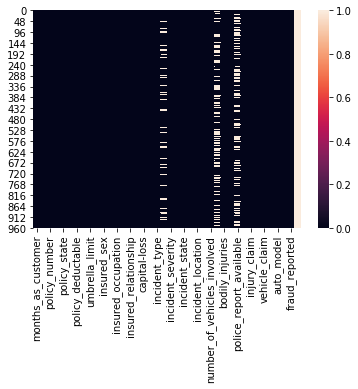

In [56]:
# heatmap of null value
sns.heatmap(paf.isnull())

In [57]:
paf=paf.drop(['_c39'], axis=1)
paf['collision_type'].fillna(paf['collision_type'].mode()[0], inplace=True)
paf['property_damage'].fillna(paf['property_damage'].mode()[0], inplace=True)
paf['police_report_available'].fillna(paf['police_report_available'].mode()[0], inplace=True)

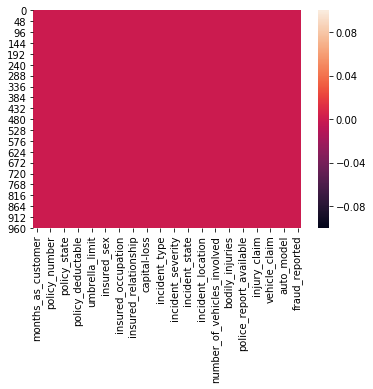

In [58]:
# heatmap of null value
sns.heatmap(paf.isnull())

In [59]:
# checking the data description
paf.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [60]:
# corelation between coloums
paf.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


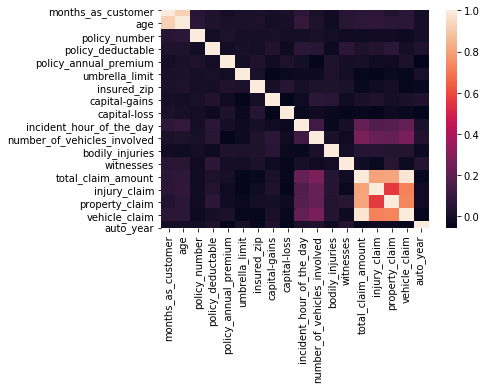

In [61]:
# heat map of corelation
sns.heatmap(paf.corr())

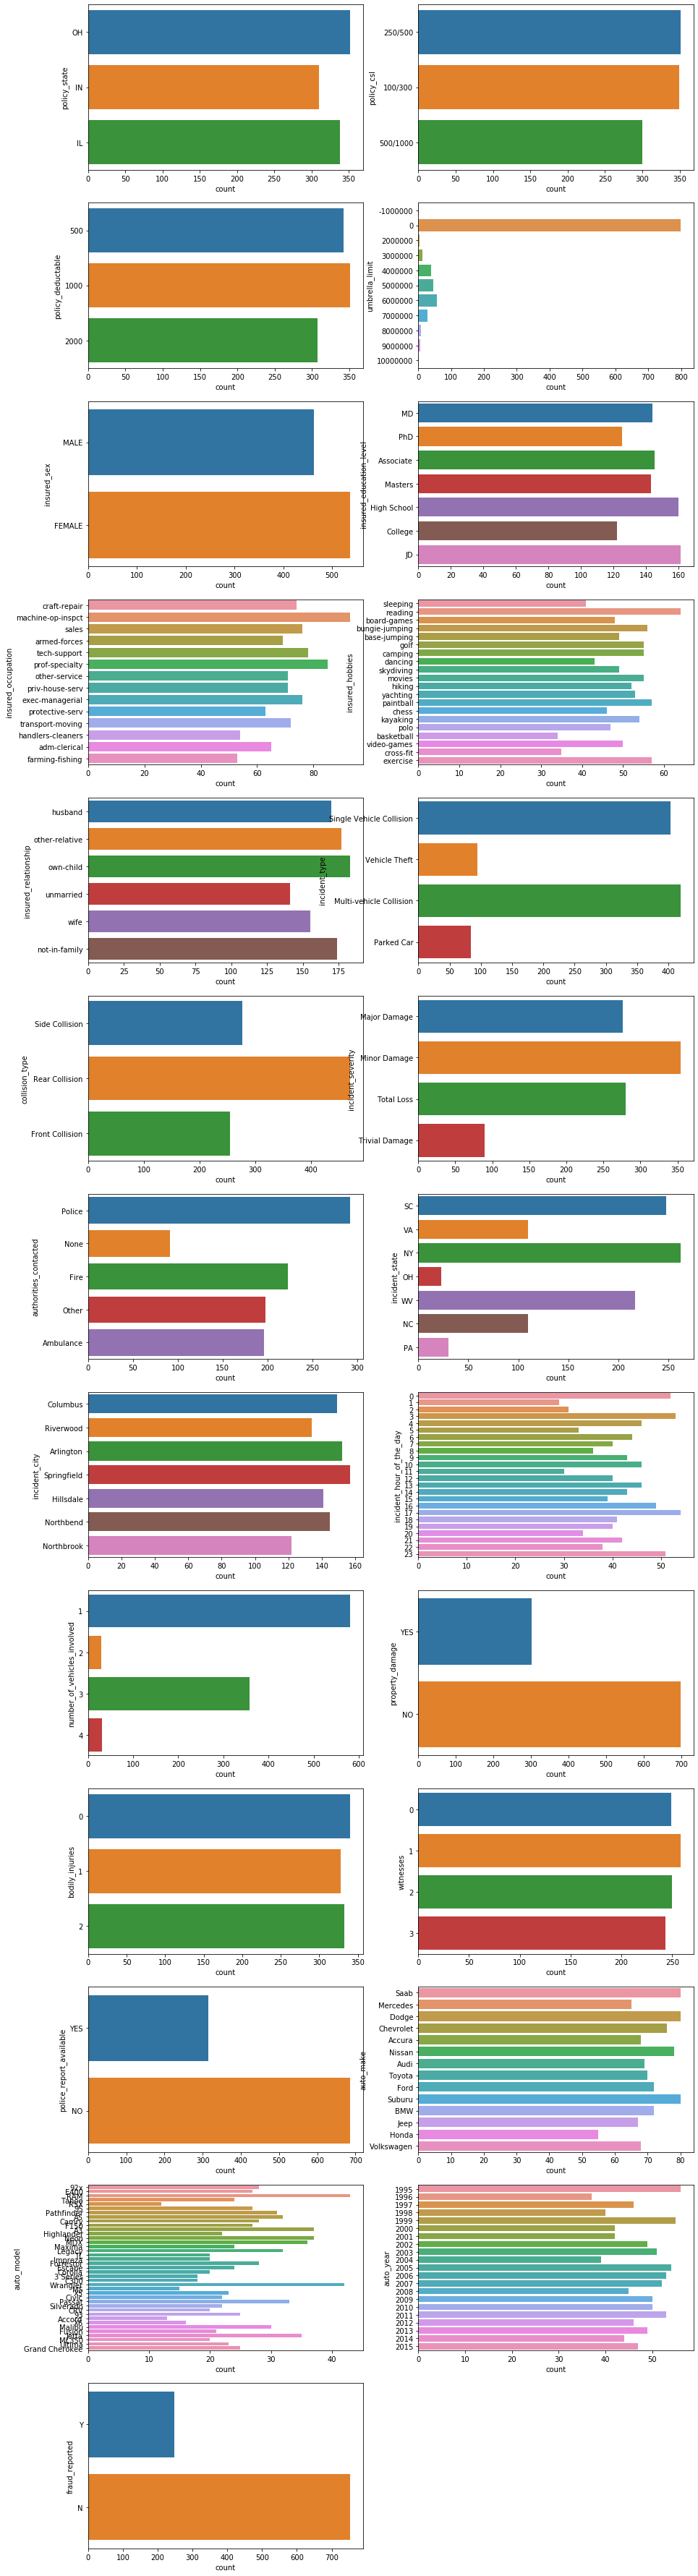

In [62]:
#creating barplot of colums to check the count of indivisual value
Index=paf[['policy_state','policy_csl','policy_deductable','umbrella_limit','insured_sex','insured_education_level',
           'insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type',
           'incident_severity','authorities_contacted','incident_state','incident_city','incident_hour_of_the_day',
           'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available',
           'auto_make','auto_model','auto_year','fraud_reported']]
figure(num=None,figsize=(15,100))
for column_index,col in enumerate(Index.columns):
    plt.subplot(20,2,column_index+1)
    sns.countplot(y=Index[col],data=Index)

In [63]:
# checking count and percentage of diffrent values in each coloums
for column_index, column in enumerate(Index.columns):
    print('\x1b[1;31m'+'Count of diffrent values in',column,'column'+'\x1b[0m')
    print(Index[column].value_counts(),'\n\n')
    print('\x1b[1;31m'+'Percentage of diffrent values in',column,'column'+'\x1b[0m')
    print(Index[column].value_counts(normalize=True),'\n\n')

Count of diffrent values in policy_state column
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 


Percentage of diffrent values in policy_state column
OH    0.352
IL    0.338
IN    0.310
Name: policy_state, dtype: float64 


Count of diffrent values in policy_csl column
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 


Percentage of diffrent values in policy_csl column
250/500     0.351
100/300     0.349
500/1000    0.300
Name: policy_csl, dtype: float64 


Count of diffrent values in policy_deductable column
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64 


Percentage of diffrent values in policy_deductable column
1000    0.351
500     0.342
2000    0.307
Name: policy_deductable, dtype: float64 


Count of diffrent values in umbrella_limit column
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000     

months_as_customer                AxesSubplot(0.125,0.772143;0.227941x0.107857)
age                            AxesSubplot(0.398529,0.772143;0.227941x0.107857)
policy_number                  AxesSubplot(0.672059,0.772143;0.227941x0.107857)
policy_deductable                 AxesSubplot(0.125,0.642714;0.227941x0.107857)
policy_annual_premium          AxesSubplot(0.398529,0.642714;0.227941x0.107857)
umbrella_limit                 AxesSubplot(0.672059,0.642714;0.227941x0.107857)
insured_zip                       AxesSubplot(0.125,0.513286;0.227941x0.107857)
capital-gains                  AxesSubplot(0.398529,0.513286;0.227941x0.107857)
capital-loss                   AxesSubplot(0.672059,0.513286;0.227941x0.107857)
incident_hour_of_the_day          AxesSubplot(0.125,0.383857;0.227941x0.107857)
number_of_vehicles_involved    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
bodily_injuries                AxesSubplot(0.672059,0.383857;0.227941x0.107857)
witnesses                         AxesSu

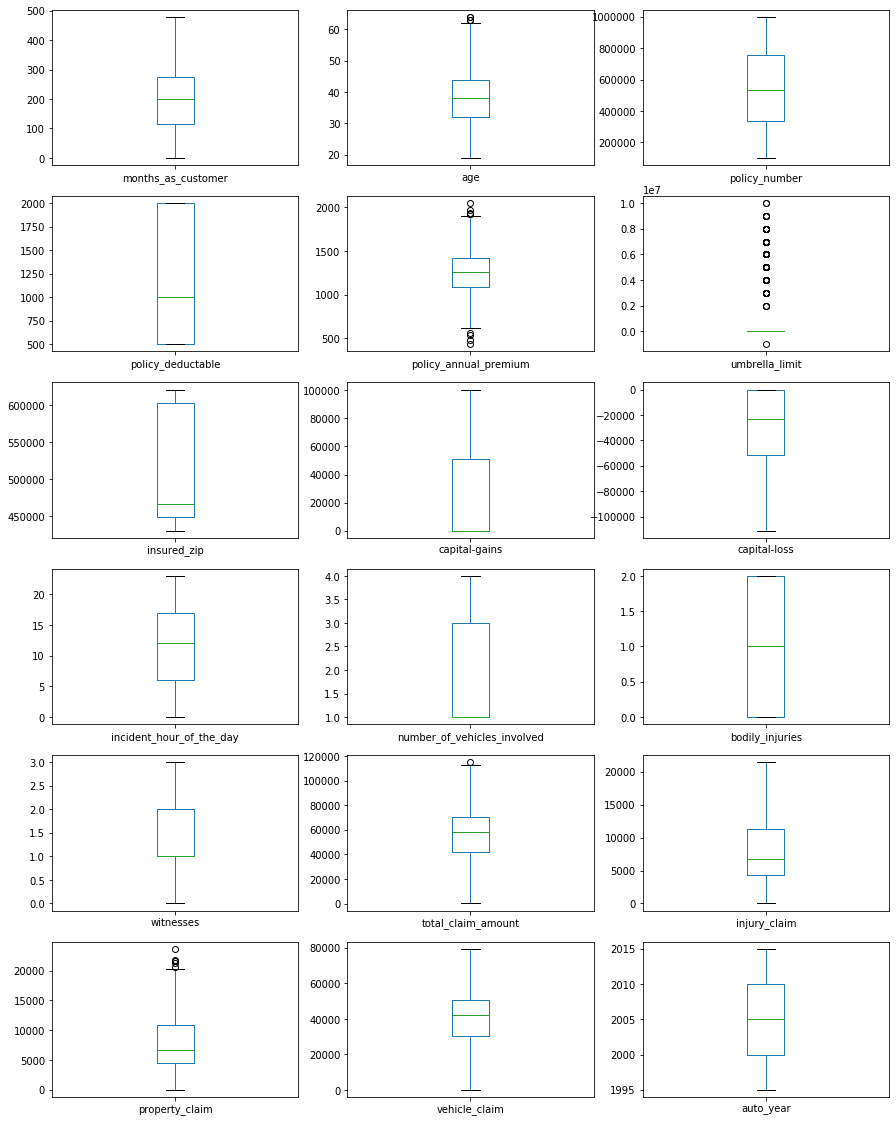

In [64]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
paf.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

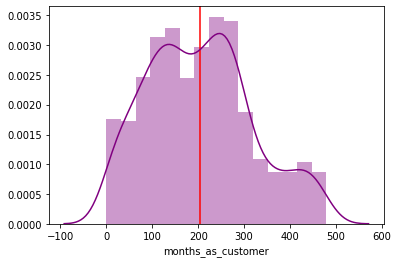

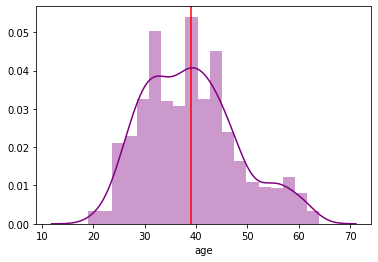

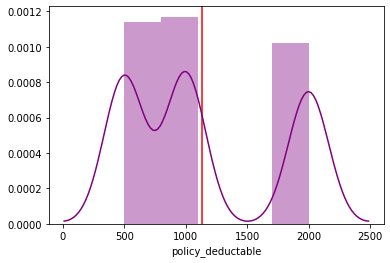

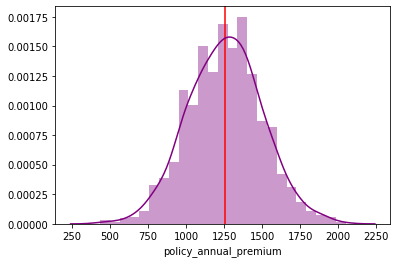

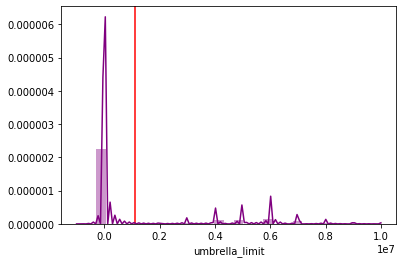

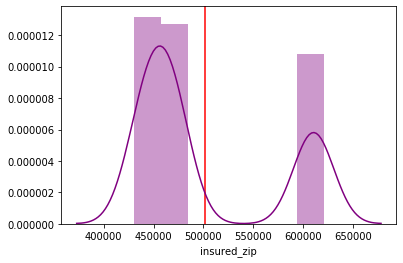

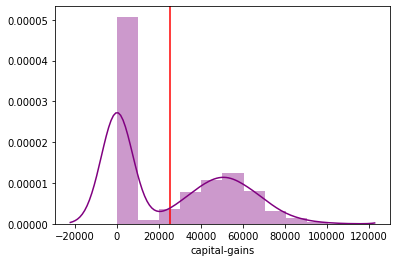

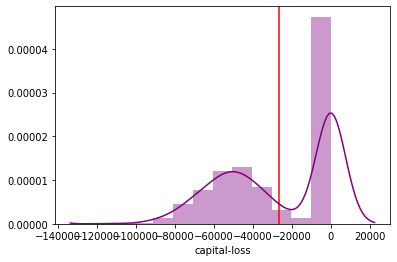

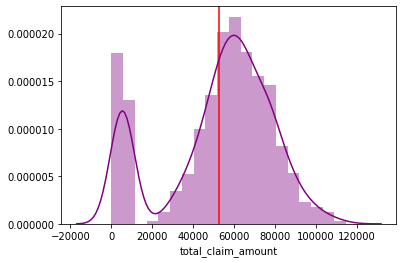

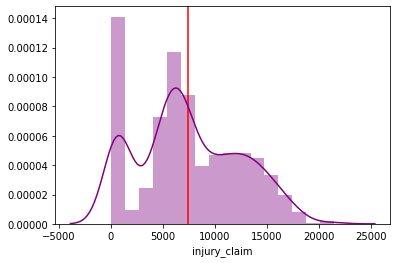

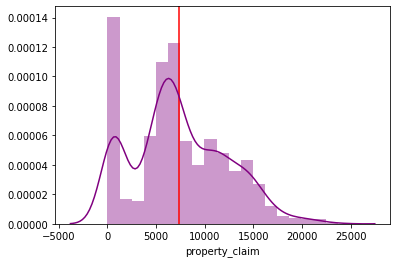

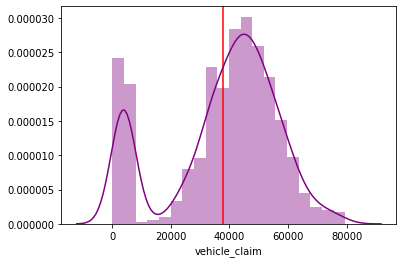

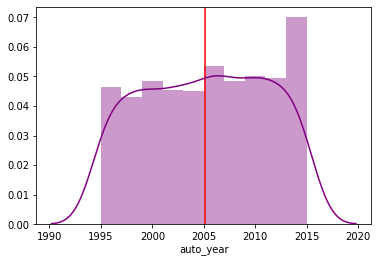

In [65]:
count=paf[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit',
           'insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim',
           'auto_year']]
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(count):
    plt.figure(i)
    plt.axvline(count[col].mean(),color = 'r')
    sns.distplot(count[col],color='purple')

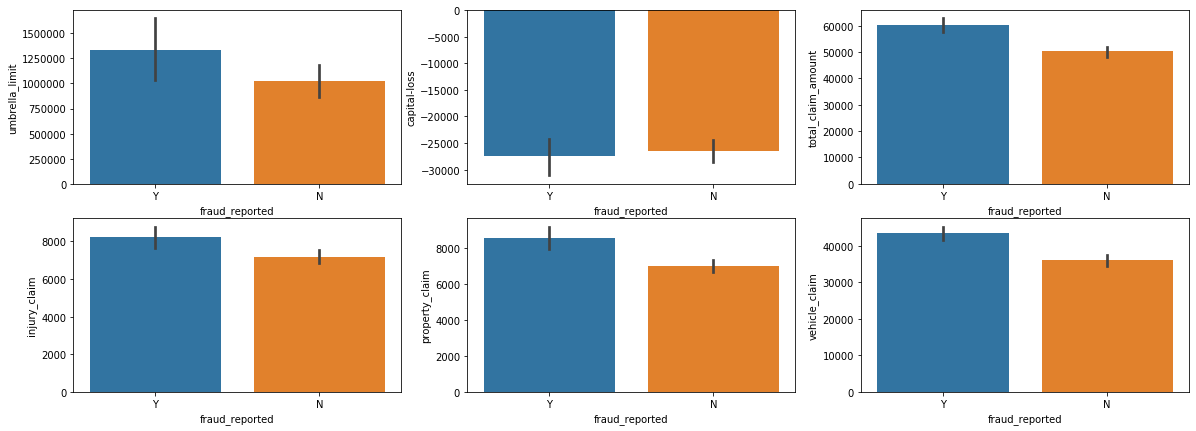

In [66]:
# creating bar plot of colums with respect to State to check distribution among State
count=paf[['umbrella_limit','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim',
           'fraud_reported']]
figure(num=None,figsize=(20,30))
for column_index, column in enumerate(count.columns):
    if column == 'fraud_reported':
        continue
    plt.subplot(8, 3, column_index+1)
    
    sns.barplot(x='fraud_reported', y=column, data=count)

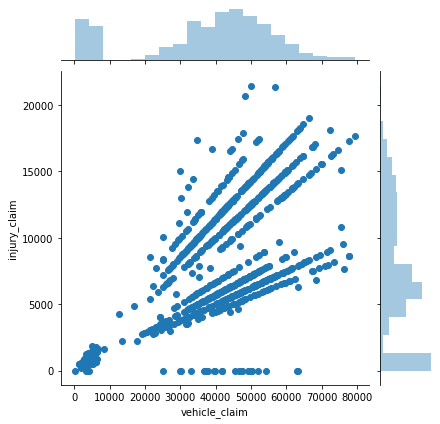

In [67]:
#distribution of vehicle_claim and injury_claim 
sns.jointplot(x='vehicle_claim', y='injury_claim', data=paf)

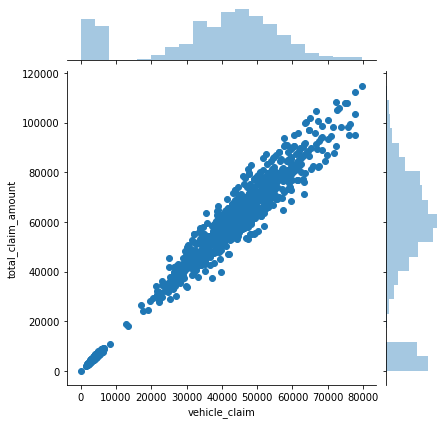

In [68]:
#distribution of vehicle_claim and total_claim_amount 
sns.jointplot(x='vehicle_claim', y='total_claim_amount', data=paf)

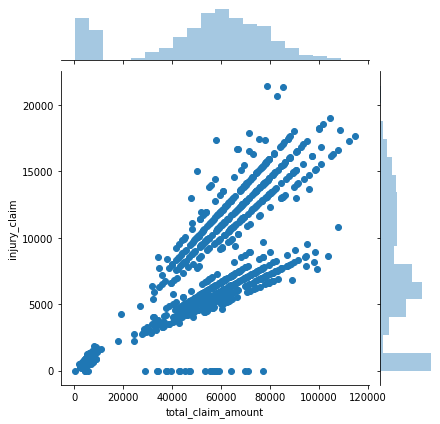

In [69]:
#distribution of total_claim_amount and injury_claim 
sns.jointplot(x='total_claim_amount', y='injury_claim', data=paf)

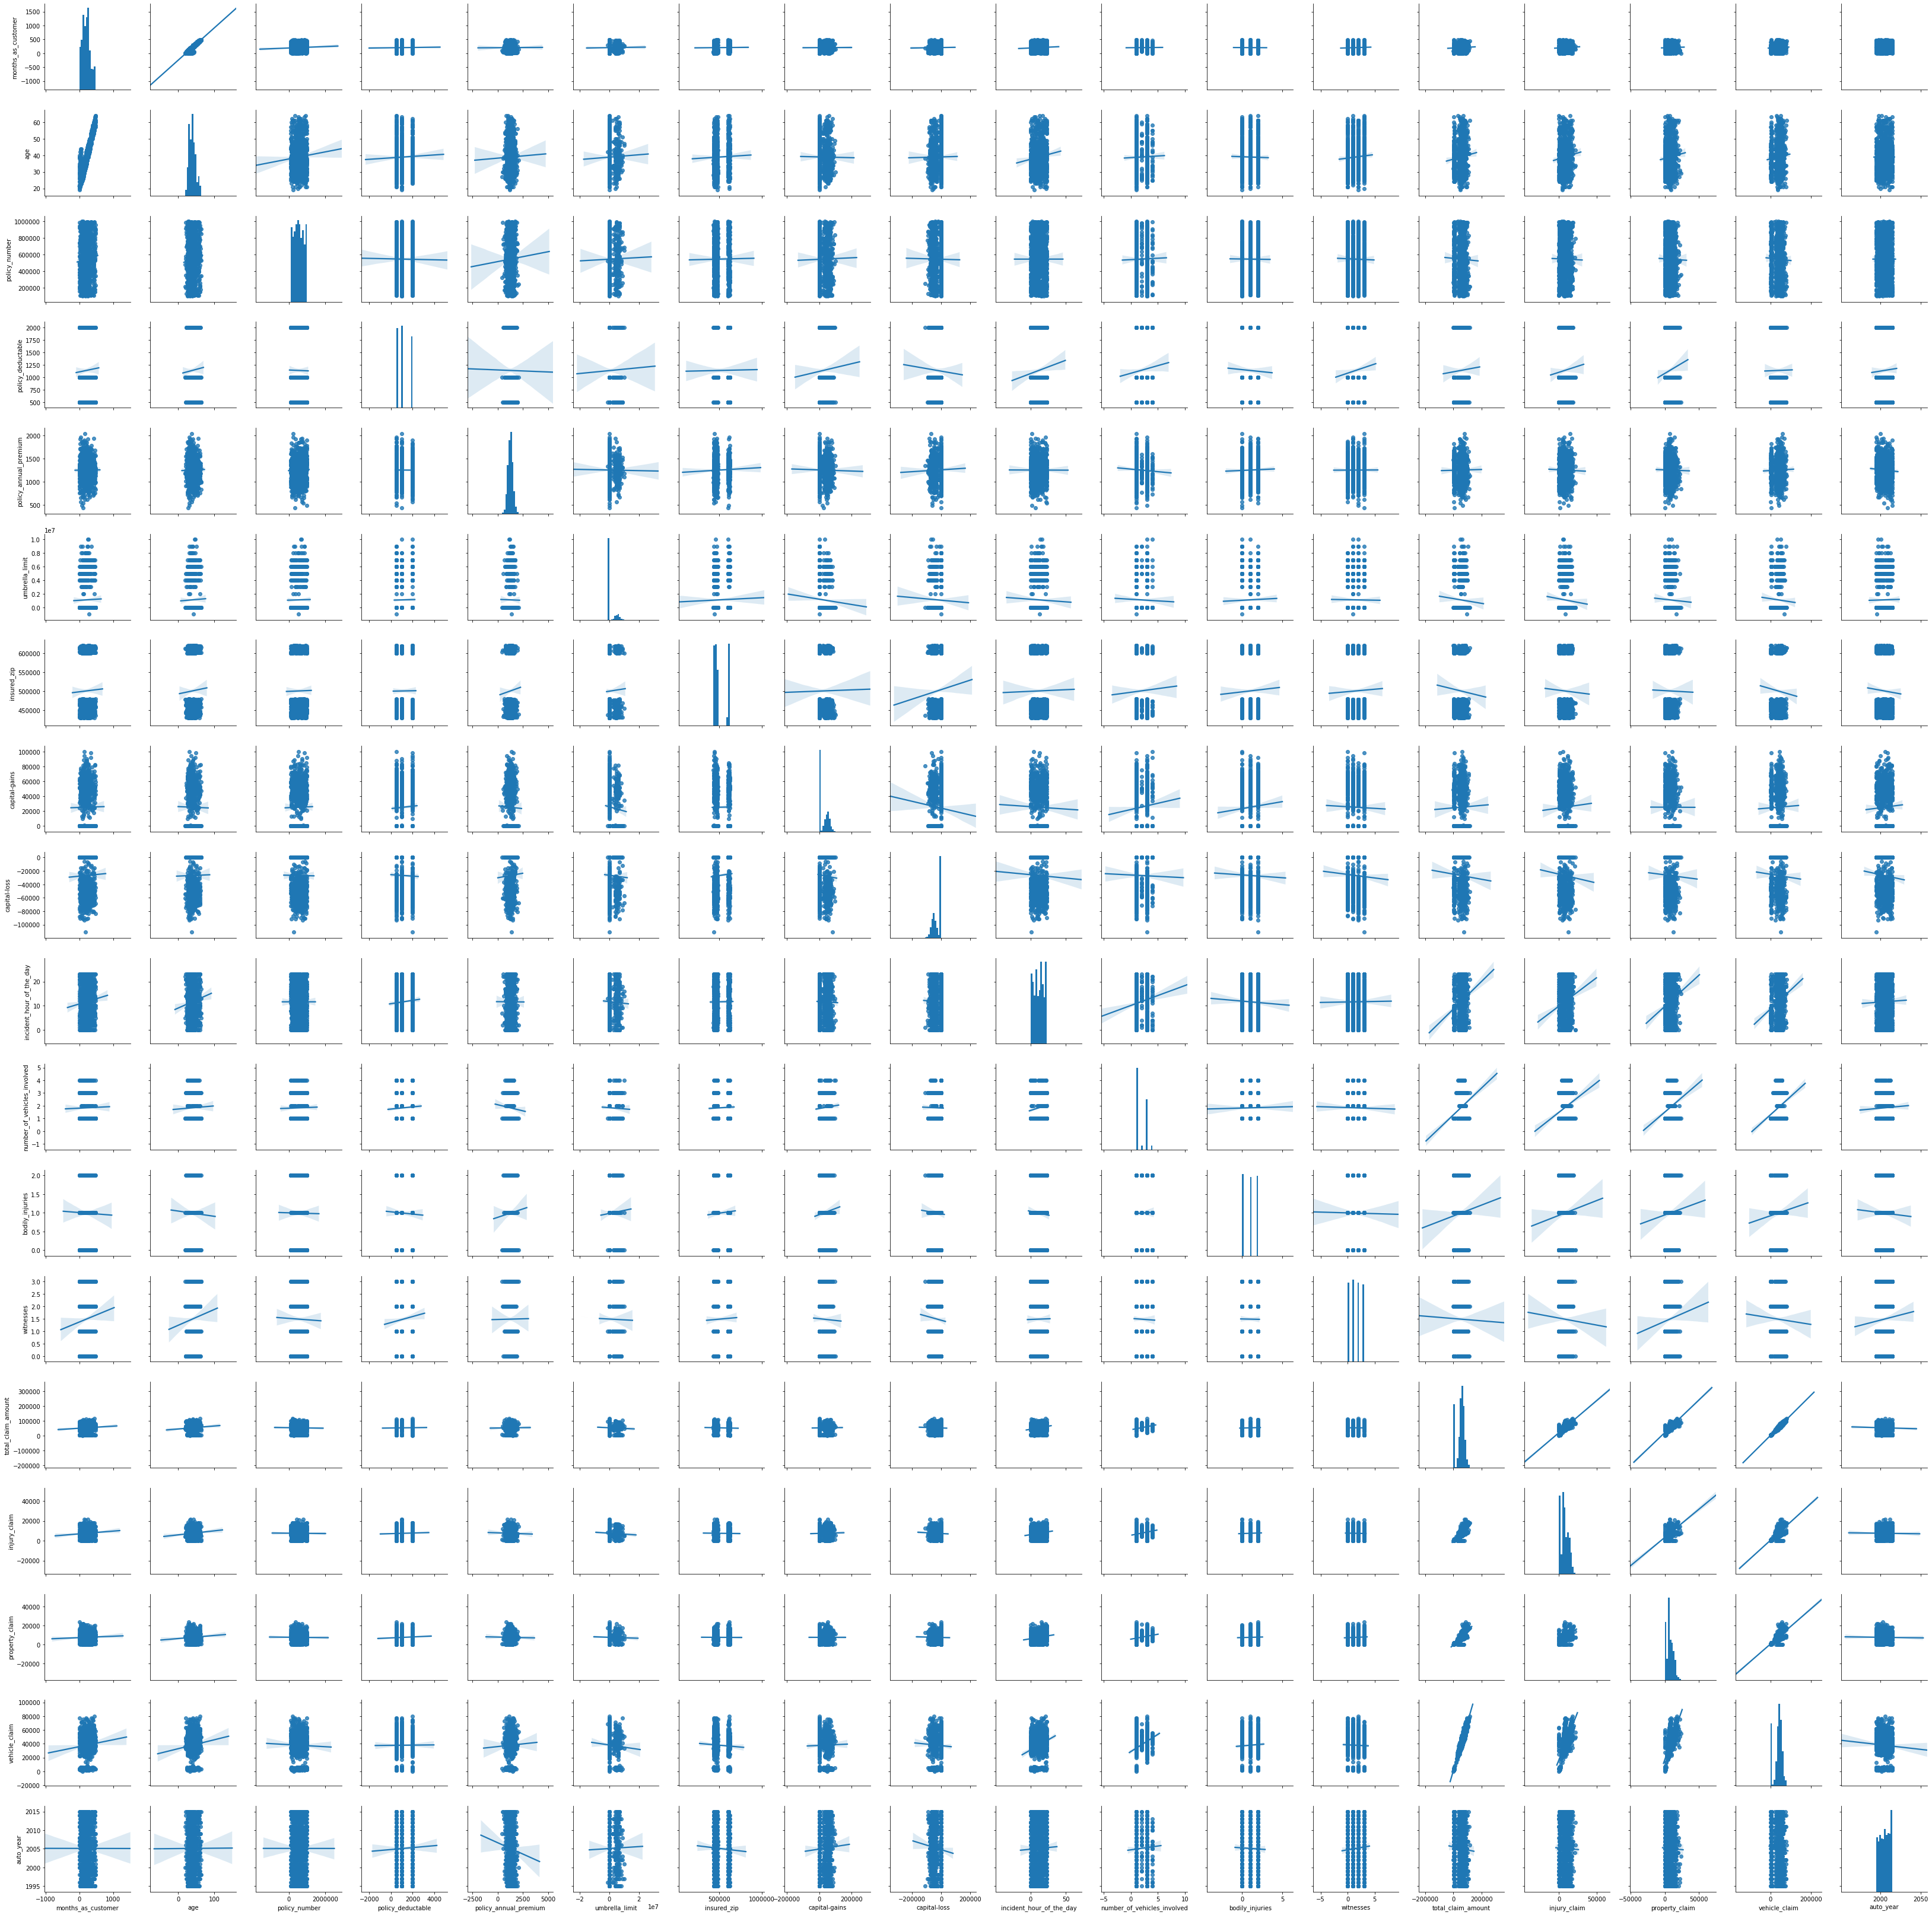

In [70]:
# pair plot to see the scatter of data
sns.pairplot(paf, kind='reg')

###### Manipulating data before bulding the model

In [71]:
#checking skewness
count=paf[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit',
           'insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim',
           'auto_year']]
print('\x1b[1;31m'+'Skewness in data\n'+'\x1b[0m')
print(count.skew())

Skewness in data

months_as_customer       0.362177
age                      0.478988
policy_deductable        0.477887
policy_annual_premium    0.004402
umbrella_limit           1.806712
insured_zip              0.816554
capital-gains            0.478850
capital-loss            -0.391472
total_claim_amount      -0.594582
injury_claim             0.264811
property_claim           0.378169
vehicle_claim           -0.621098
auto_year               -0.048289
dtype: float64


In [72]:
#removing skewness
for col in count.columns:
    if count.skew().loc[col]>0.55:
        paf[col]=np.power(paf[col],1/3)
    
    if count.skew().loc[col]<-0.55:
        paf[col]=np.power(paf[col],2)
paf.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.532323
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount             0.533008
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                  0.488948
auto_year                     -0.048289
dtype: float64

In [73]:
#dropping unnecessary  columns
paf=paf.drop(['policy_number','policy_bind_date','insured_zip','incident_date','incident_location',], axis=1)

#changing data type of a column
paf['umbrella_limit'] = paf['umbrella_limit'].replace(0, np.nan)
paf['umbrella_limit'] = paf['umbrella_limit'].fillna(0).astype(int)

In [74]:
#masking of object column
categorial_mask=paf.dtypes==object

#categorical columns
categorical_cols=paf.columns[categorial_mask].tolist()

# label encoding the data
le=LabelEncoder()

paf[categorical_cols]=paf[categorical_cols].apply(lambda col:le.fit_transform(col))

paf.sample(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
811,114,30,2,1,1000,1173.25,0,0,5,10,...,3,1,21902400,520,520,13249600,3,25,2013,0
189,128,28,2,2,1000,986.53,0,0,2,0,...,2,1,10375459600,18520,18520,4201632400,6,8,2007,0
969,398,55,2,1,500,862.19,0,1,2,0,...,3,0,43560000,600,1200,23040000,0,23,2012,0
1,228,42,1,1,2000,1197.22,170,1,4,6,...,0,0,25704900,780,780,12320100,8,12,2007,1
45,265,40,0,1,1000,1454.43,0,0,4,10,...,3,0,3038214400,6890,0,2326132900,0,23,2002,0


In [75]:
#removing outlires 
count=paf[['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit',
           'capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim',
           'auto_year']]
z=abs(zscore(count))
print(paf.shape)
paf=paf.loc[(z<3).all(axis=1)]
print(paf.shape)

(1000, 34)
(983, 34)


In [76]:
# dividing dataset into input values 'x' and output value 'y'
x = paf.drop(['fraud_reported'],axis=1)
print('x dataset\n',x.head(),'\n')
y=paf['fraud_reported']
print('y datase\n',y.sample(5))
print(x.shape)
print(y.shape)

x dataset
    months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22             170            1   
2                1413.14             170            0   
3                1415.74             181            0   
4                1583.91             181            1   

   insured_education_level  insured_occupation  ...  bodily_injuries  \
0                        4                   2  ...                1   
1                        4                   6  ...

In [77]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe classification model, to find out the best model

In [78]:
#creating models array with all the model
Models=[('SVC',SVC()),('GaussianNB',GaussianNB()),('SGDClassifier',SGDClassifier(random_state=10)),('LogisticRegression',LogisticRegression()),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=10)),('GradientBoostingClassifier',GradientBoostingClassifier()),
        ('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()),('RandomForestClassifier',RandomForestClassifier(random_state=10)),
        ('KNeighborsClassifier',KNeighborsClassifier()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())]

In [79]:
# loop to find out the maximum ayuray of all the model in models arrac along the range of random state
Model_array=[]
Random_state=[]
Max_accuracy_array=[]
for name,model in Models:
    max_accuracy=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,stratify=y,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        accuracy=accuracy_score(test_y,pred)
        
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_accuracy_array.append(max_accuracy)

In [80]:
# comparing the performances of all the model on accuracy basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'Accuracy': Max_accuracy_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Random state
5,GradientBoostingClassifier,0.873096,81
3,LogisticRegression,0.842640,24
4,DecisionTreeClassifier,0.842640,21
6,LinearDiscriminantAnalysis,0.842640,24
2,SGDClassifier,0.827411,24
7,RandomForestClassifier,0.827411,43
1,GaussianNB,0.817259,62
8,KNeighborsClassifier,0.786802,47
0,SVC,0.771574,27
9,QuadraticDiscriminantAnalysis,0.766497,44


###### Conclusion
On basis of Accuracy GradientBoostingClassifier model is performing the best with maximum Accuracy

In [81]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='accuracy')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [82]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
5,GradientBoostingClassifier,0.813935,0.042712
7,RandomForestClassifier,0.771212,0.038836
3,LogisticRegression,0.771171,0.035450
4,DecisionTreeClassifier,0.770212,0.051277
6,LinearDiscriminantAnalysis,0.767089,0.038653
0,SVC,0.749804,0.034903
1,GaussianNB,0.742692,0.050102
2,SGDClassifier,0.721264,0.043663
8,KNeighborsClassifier,0.712183,0.039211
9,QuadraticDiscriminantAnalysis,0.698846,0.052432


###### Conclusion
On basis of Crossval score for Accuracy GradientBoostingClassifier model is performing the best with maximum Crossval score

###### On basis of our compression of Accuracy score and Cross val score i choose GradientBoostingClassifier model since it performing best on given data

In [87]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'max_depth':[2,3,4,5,6],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],
            'n_estimators':[50,100,200,300,400,500],'min_samples_leaf':[1,2,3,4]}
mod=GradientBoostingClassifier()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='accuracy',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [88]:
grid_result.best_score_

0.8372329603255341

In [89]:
grid_result.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [90]:
grid_result.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy score of model is :  0.8375634517766497 

The mean of cross_val_score for the model is: 0.8372809729952587 

Precision score of model is : 0.7 

Recall score of model is : 0.5833333333333334 

F1_score score of model is : 0.6363636363636365 

Confusion matrix for themodel is : 
 [[137  12]
 [ 20  28]] 

Classification report for the model is : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       149
           1       0.70      0.58      0.64        48

    accuracy                           0.84       197
   macro avg       0.79      0.75      0.77       197
weighted avg       0.83      0.84      0.83       197
 



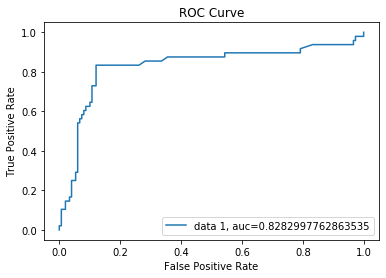

In [86]:
gbc=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=81,stratify=y,shuffle=True)
gbc.fit(train_x,train_y)
pred=gbc.predict(test_x)
predict_proba = gbc.predict_proba(test_x)[::,1]
kf=KFold(n_splits=10,random_state=5)

score=cross_val_score(gbc,x,y,cv=kf,scoring='accuracy')

print('Accuracy score of model is : ',accuracy_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score.mean(),'\n')

print('Precision score of model is :',precision_score(test_y, pred),'\n')
print('Recall score of model is :',recall_score(test_y, pred),'\n')
print('F1_score score of model is :',f1_score(test_y, pred),'\n')

print('Confusion matrix for themodel is : \n',confusion_matrix(test_y,pred),'\n')
print('Classification report for the model is : \n',classification_report(test_y,pred),'\n')

fpr, tpr, thresholds  = roc_curve(test_y,  predict_proba)
auc = roc_auc_score(test_y, predict_proba)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [87]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 16 Predict the Automobile Insurance claim part 2.csv')

In [88]:
# saving the model using pickle.
joblib.dump(gbc,'gbc_Project 16 Predict the Automobile Insurance claim part 2.pkl')

['gbc_Project 16 Predict the Automobile Insurance claim part 2.pkl']